# Data Preparation

In [1]:
from google.colab import files

uploaded = files.upload()

Saving customer_shopping_data.csv to customer_shopping_data.csv


In [2]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['customer_shopping_data.csv']))
df = df.sort_values(by='invoice_date')

In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
36199,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,1/1/2021,Metrocity
45626,I371949,C260427,Male,50,Toys,2,71.68,Credit Card,1/1/2021,Metrocity
74986,I274757,C231715,Male,44,Cosmetics,2,81.32,Credit Card,1/1/2021,Mall of Istanbul
9456,I323282,C134774,Female,33,Shoes,5,3000.85,Cash,1/1/2021,Metrocity
36006,I263376,C600632,Female,50,Food & Beverage,5,26.15,Cash,1/1/2021,Metrocity


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 36199 to 15220
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [5]:
df.shape

(99457, 10)

In [6]:
# check missing value
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
# check duplicate data
df.duplicated().sum()

0

In [8]:
# add new column :  total_price = price * quantity
df['total_price'] = df['price'] * df['quantity']

In [9]:
# add new colomn : invoice_month

import datetime

df['invoice_date'] = df['invoice_date'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime('%Y-%m-%d'))
df['invoice_month'] = df['invoice_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))

In [10]:
# change to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_month'] = pd.to_datetime(df['invoice_month'])

In [11]:
# add column : invoice_day
df['invoice_day'] = df['invoice_date'].dt.day
df['invoice_day'] = df['invoice_date'].dt.day_name()

In [12]:
# add column : age_group
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '>60']
age_bins = [0, 20, 30, 40, 50, 60, 71]
df["age_group"] =pd.cut(df['age'],
                            bins=age_bins, 
                         labels=age_labels)

In [13]:
# add column : price_group
price_labels = ['0-1000', '1001-2000', '2001-3000', '4001-5000', '>5000']
price_bins = [0, 1000, 2000, 3000, 4000, 5100 ]
df["price_group"] =pd.cut(df['price'],
                            bins=price_bins, 
                         labels=price_labels)

In [14]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,invoice_month,invoice_day,age_group,price_group
5443,I142487,C311273,Male,65,Shoes,1,600.17,Cash,2022-09-09,Metrocity,600.17,2022-09-01,Friday,>60,0-1000
92297,I156458,C107947,Female,36,Shoes,3,1800.51,Credit Card,2022-09-09,Zorlu Center,5401.53,2022-09-01,Friday,31-40,1001-2000
45393,I162130,C569143,Male,44,Toys,1,35.84,Credit Card,2022-09-09,Emaar Square Mall,35.84,2022-09-01,Friday,41-50,0-1000
5555,I298518,C392548,Male,19,Clothing,4,1200.32,Debit Card,2022-09-09,Metrocity,4801.28,2022-09-01,Friday,10-20,1001-2000
15220,I138457,C285630,Female,31,Cosmetics,1,40.66,Credit Card,2022-09-09,Viaport Outlet,40.66,2022-09-01,Friday,31-40,0-1000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 36199 to 15220
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  total_price     99457 non-null  float64       
 11  invoice_month   99457 non-null  datetime64[ns]
 12  invoice_day     99457 non-null  object        
 13  age_group       99457 non-null  category      
 14  price_group     98456 non-null  category      
dty

In [16]:
df.shape

(99457, 15)

# Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)

## Total Spending per Month

In [18]:
df_spending_per_month = df.groupby('invoice_month')['total_price'].sum().reset_index().sort_values(by='total_price')
df_spending_per_month

,invoice_month,total_price
26,2023-03-01,2514146.79
13,2022-02-01,8344111.92
1,2021-02-01,8772315.22
22,2022-11-01,8941584.66
8,2021-09-01,9188165.62
10,2021-11-01,9265555.29
5,2021-06-01,9286271.35
15,2022-04-01,9326144.44
3,2021-04-01,9389541.54
2,2021-03-01,9455359.38


In [19]:
low_total_price = min(df_spending_per_month['total_price'].tolist())
print(low_total_price)

df_lowest_total_price = df_spending_per_month[df_spending_per_month['total_price'] > low_total_price]
lowest_total_price = min(df_lowest_total_price['total_price'].tolist())
print(lowest_total_price)

highest_total_price = max(df_spending_per_month['total_price'].tolist())
print(highest_total_price)


2514146.79
8344111.92
10311119.68


In [20]:
highest_lowest_totalPrice = df_spending_per_month[(df_spending_per_month['total_price'] == lowest_total_price) | (df_spending_per_month['total_price'] == highest_total_price) | (df_spending_per_month['total_price'] == low_total_price)]
highest_lowest_totalPrice

,invoice_month,total_price
26,2023-03-01,2514146.79
13,2022-02-01,8344111.92
6,2021-07-01,10311119.68


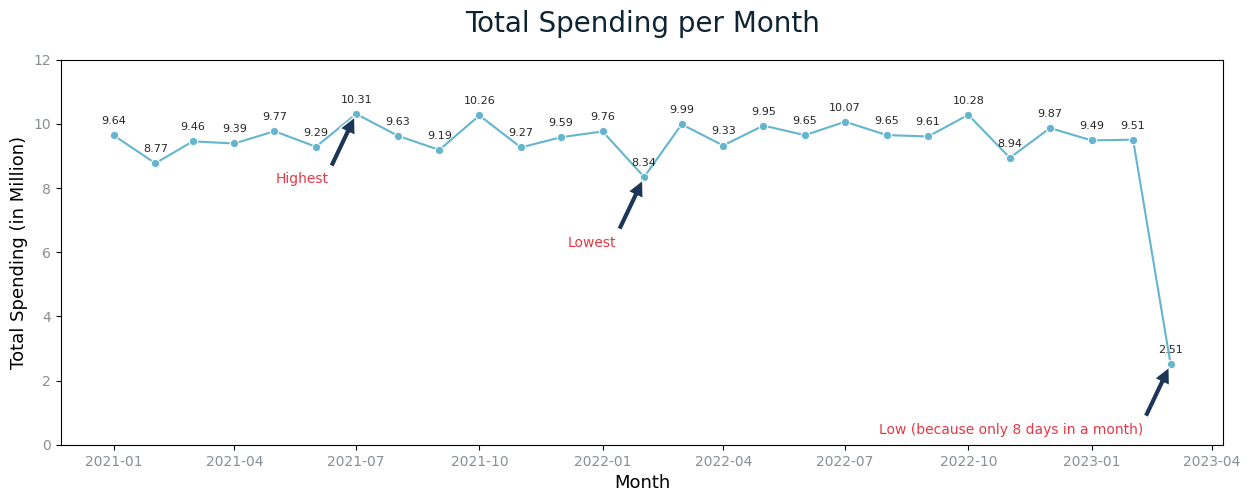

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_spending_per_month, x='invoice_month', y='total_price', color='c', marker='o')

#
for x, y in zip(df_spending_per_month['invoice_month'], df_spending_per_month['total_price']):
  label = "{:.2f}".format(y/1000000)
  plt.annotate(label,
                  (x,y),
                  textcoords="offset points",
                  xytext=(0,8),
                  ha='center',
                  size=8
                  )
#

#
i=0
for x, y in zip(highest_lowest_totalPrice['invoice_month'], highest_lowest_totalPrice['total_price']):
  label = ['Low (because only 8 days in a month)','Lowest','Highest']
  plt.annotate(label[i], 
                  (x,y), 
                  textcoords="offset points",
                  xytext=(-20,-50),
                  color='#e63946',
                  ha='right',
                  size=10, arrowprops=dict(facecolor='#1d3557', shrink=0.05)
                  )
  i = i + 1
#


plt.title('Total Spending per Month', pad=20, fontsize=20, color='#0E2433')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Spending (in Million)', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
#plt.xlim(xmin=0) 
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

## The most used payment method based on the customer's gender

In [22]:
df_customer_per_payment = df.groupby('payment_method')['customer_id'].count().reset_index()
df_customer_per_payment

,payment_method,customer_id
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


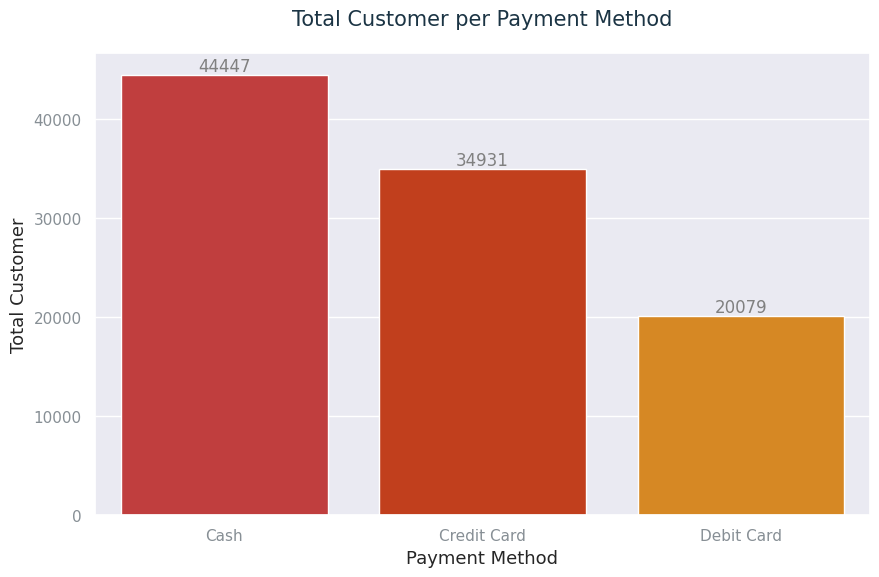

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_customer_per_payment, x='payment_method', y='customer_id',  palette=['#d62828','#dc2f02','#f48c06'])

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='grey')

plt.title('Total Customer per Payment Method', pad=20, fontsize=15, color='#1B3444')
plt.xlabel('Payment Method', fontsize=13)
plt.ylabel('Total Customer', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.show()

## Total Quantity per Category Breakdown by Gender

In [27]:
df_quantity_per_category = df.groupby(['category','gender'])['quantity'].sum().reset_index()
df_quantity_per_category

,category,gender,quantity
0,Books,Female,8776
1,Books,Male,6206
2,Clothing,Female,62039
3,Clothing,Male,41519
4,Cosmetics,Female,27261
5,Cosmetics,Male,18204
6,Food & Beverage,Female,26362
7,Food & Beverage,Male,17915
8,Shoes,Female,17906
9,Shoes,Male,12311


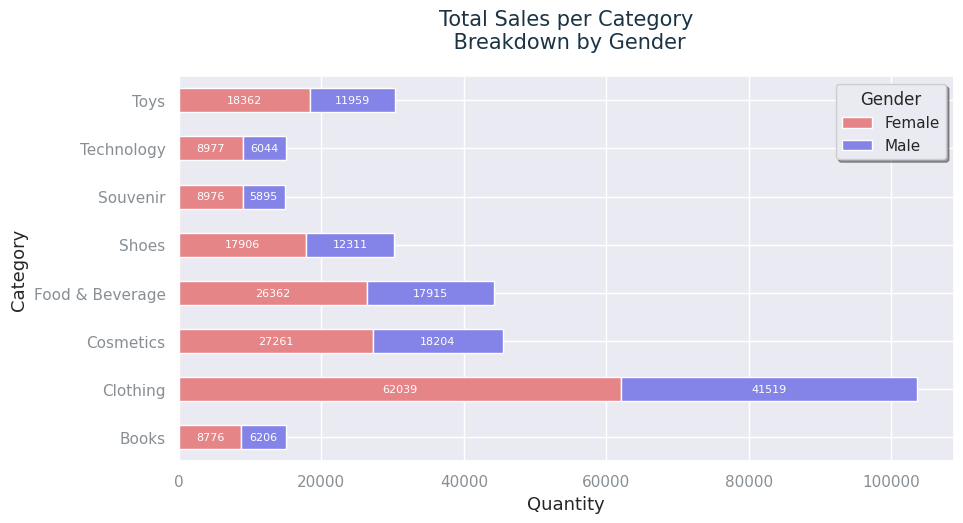

In [28]:
ax = df_quantity_per_category.groupby(['category','gender'])['quantity'].sum().unstack().plot(kind='barh', 
                                                                                  stacked=True, 
                                                                                  figsize=(10, 5), 
                                                                                  color=['#E58588', '#8484E8'], 
                                                                                  )
# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='center', fontsize=8, color='white')

plt.title('Total Sales per Category\n Breakdown by Gender', pad=20, fontsize=15, color='#1B3444')
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('Category', fontsize=13)
plt.legend(title='Gender', shadow=True)
plt.show()

## Total Customer per gender

In [32]:
df_customer_per_gender = df.groupby('gender').agg({
    'customer_id': 'count',
    'total_price' : 'sum'}).reset_index()
df_customer_per_gender['total_price'] = df_customer_per_gender['total_price'].astype(int)
df_customer_per_gender

,gender,customer_id,total_price
0,Female,59482,150207136
1,Male,39975,101298658


In [33]:
df['total_price'].sum()

251505794.25

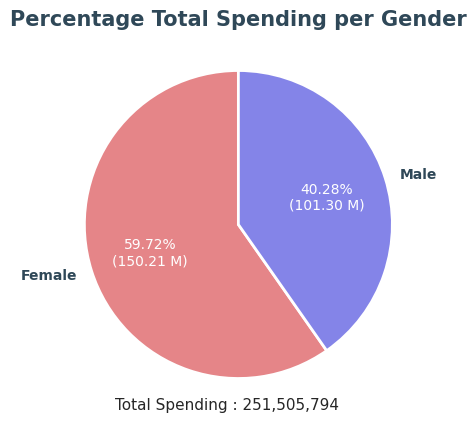

In [34]:
colors = sns.color_palette(['#E58588', '#8484E8'])[0:5]
fig, ax=plt.subplots(figsize=(5,5), subplot_kw=dict(aspect='equal'))
wadges, texts, autotexts=ax.pie(df_customer_per_gender['total_price'], labels=df_customer_per_gender['gender']
                              , startangle=90
                              , colors=colors
                              , wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}
                              , autopct=lambda p:"{:.2f}%\n({:.2f} M)".format(p, (p*sum(df_customer_per_gender['total_price'])/100)/1000000)
                              , textprops=dict(color='k', weight='bold', fontsize=10))
plt.setp(autotexts, color='white', fontweight='normal')
plt.setp(texts, color='#2F4858')
plt.title('Percentage Total Spending per Gender', pad=5, fontsize=15, color='#2F4858', weight='bold')
plt.text(-0.8,-1.2,"Total Spending : " + str('{:,}'.format(df_customer_per_gender['total_price'].sum())), fontsize=11)
plt.show()


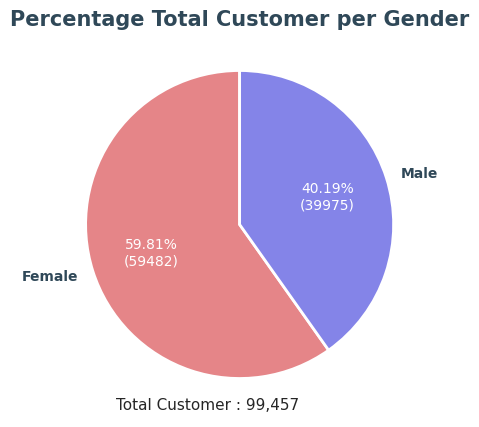

In [35]:
colors = sns.color_palette(['#E58588', '#8484E8'])[0:5]
fig, ax=plt.subplots(figsize=(5,5), subplot_kw=dict(aspect='equal'))
wadges, texts, autotexts=ax.pie(df_customer_per_gender['customer_id'], labels=df_customer_per_gender['gender']
                              , startangle=90
                              , colors=colors
                              , wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}
                              , autopct=lambda p:"{:.2f}%\n({:.0f})".format(p, p*sum(df_customer_per_gender['customer_id'])/100)
                              , textprops=dict(color='k', weight='bold', fontsize=10))
plt.setp(autotexts, color='white', fontweight='normal')
plt.setp(texts, color='#2F4858', fontweight='bold')
plt.title('Percentage Total Customer per Gender', pad=5, fontsize=15, color='#2F4858', weight='bold')
plt.text(-0.8,-1.2,"Total Customer : " + str('{:,}'.format(df_customer_per_gender['customer_id'].sum())), fontsize=11)
plt.show()

## Total Customer per Shopping Mall Breakdown by Gender

In [39]:
df_customer_per_shoppingMall = df.groupby(['shopping_mall','gender'])['customer_id'].count().reset_index()
df_customer_per_shoppingMall

,shopping_mall,gender,customer_id
0,Cevahir AVM,Female,2940
1,Cevahir AVM,Male,2051
2,Emaar Square Mall,Female,2842
3,Emaar Square Mall,Male,1969
4,Forum Istanbul,Female,3016
5,Forum Istanbul,Male,1931
6,Istinye Park,Female,5874
7,Istinye Park,Male,3907
8,Kanyon,Female,11906
9,Kanyon,Male,7917


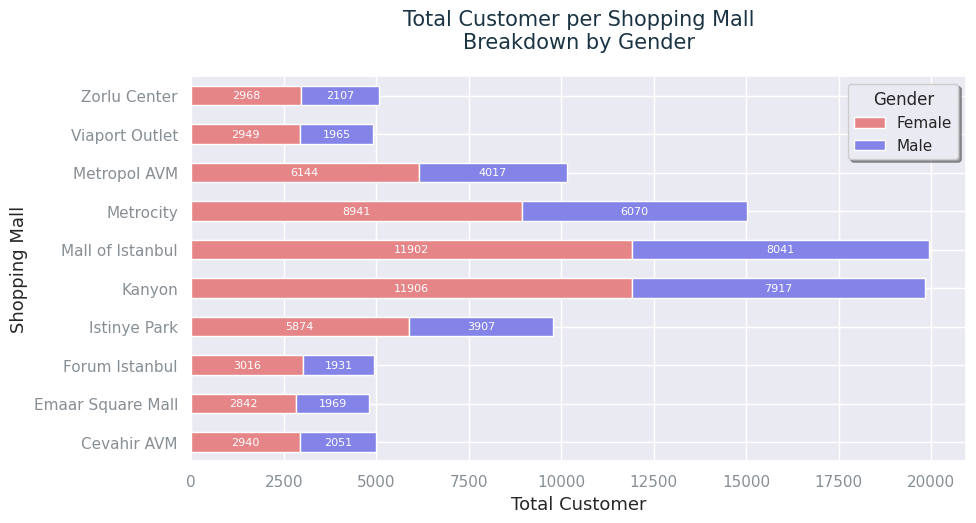

In [40]:
ax = df.groupby(['shopping_mall','gender'])['customer_id'].count().unstack().plot(kind='barh', 
                                                                                  stacked=True, 
                                                                                  figsize=(10, 5), 
                                                                                  color=['#E58588', '#8484E8'], 
                                                                                  )
# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='center', fontsize=8, color='white')

ax.set_title('Total Customer per Shopping Mall\nBreakdown by Gender', pad=20, fontsize=15, color='#1B3444')
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.xlabel('Total Customer', fontsize=13)
plt.ylabel('Shopping Mall', fontsize=13)
plt.legend(title='Gender', shadow=True)
plt.show()

## Distribusion of customer age

In [41]:
df_ageGroup_per_customer = df.groupby('age_group')['customer_id'].count().reset_index()
df_ageGroup_per_customer

,age_group,customer_id
0,10-20,5624
1,21-30,19400
2,31-40,19266
3,41-50,19066
4,51-60,18932
5,>60,17169


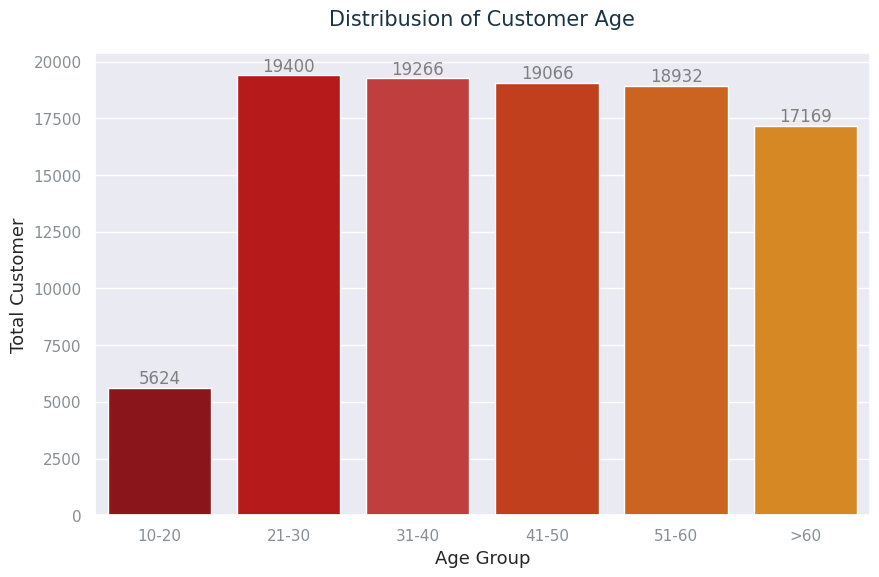

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_ageGroup_per_customer, x='age_group', y='customer_id',  palette=['#9d0208','#d00000','#d62828','#dc2f02','#e85d04','#f48c06'])

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='grey')

plt.title('Distribusion of Customer Age', pad=20, fontsize=15, color='#1B3444')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Total Customer', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.show()

In [43]:
df_quantity_per_ageGroup = df.groupby(['age_group','category'])['quantity'].sum().reset_index()
df_quantity_per_ageGroup

,age_group,category,quantity
0,10-20,Books,905
1,10-20,Clothing,5811
2,10-20,Cosmetics,2501
3,10-20,Food & Beverage,2543
4,10-20,Shoes,1770
5,10-20,Souvenir,826
6,10-20,Technology,716
7,10-20,Toys,1729
8,21-30,Books,2934
9,21-30,Clothing,20283


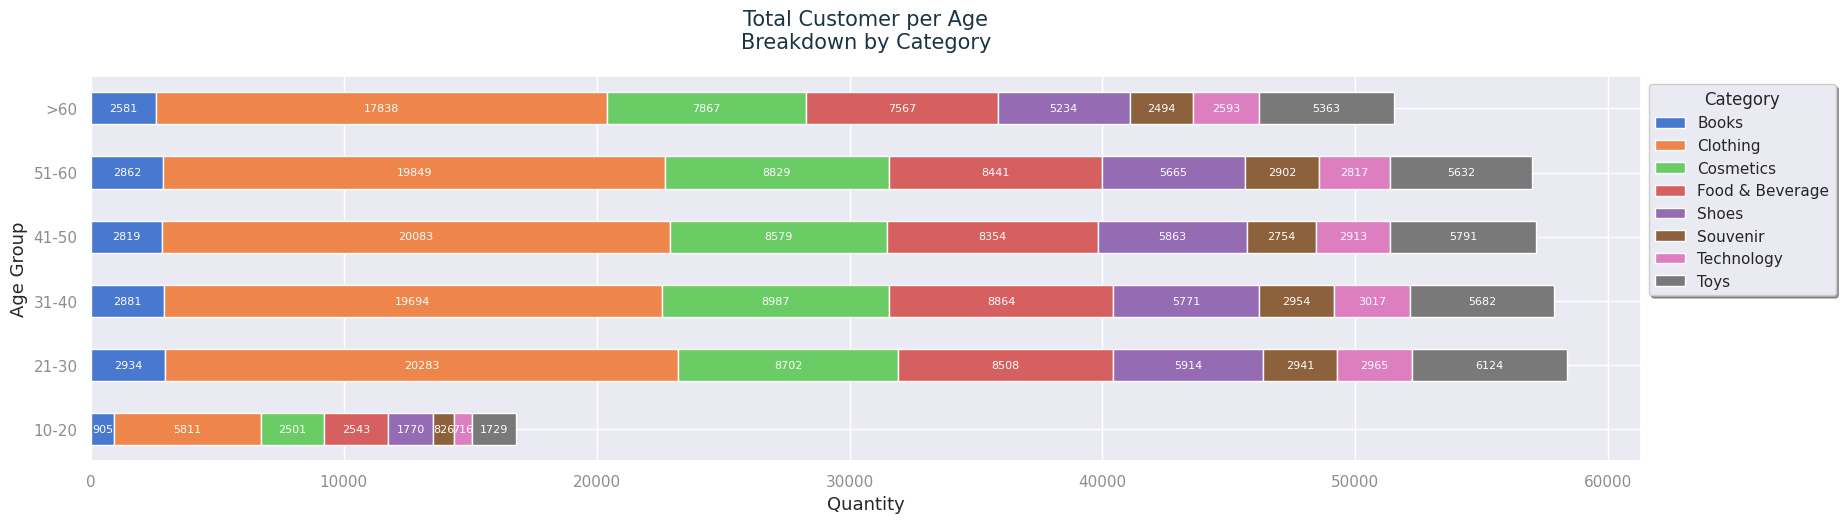

In [44]:
colors = sns.color_palette('muted')
ax = df.groupby(['age_group','category'])['quantity'].sum().unstack().plot(kind='barh', 
                                                                                  stacked=True, 
                                                                                  figsize=(20, 5),
                                                                                  color=colors 
                                                                                  )
# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='center', fontsize=8, color='white')

ax.set_title('Total Customer per Age\nBreakdown by Category', pad=20, fontsize=15, color='#1B3444')
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('Age Group', fontsize=13)
plt.legend(title='Category', shadow=True, loc='upper left', bbox_to_anchor=(1,1))
plt.show()

## Distribution price

In [45]:
df_quantity_per_price = df.groupby('price_group')['quantity'].sum().reset_index()
df_quantity_per_price

,price_group,quantity
0,0-1000,193322
1,1001-2000,73201
2,2001-3000,10088
3,4001-5000,13092
4,>5000,4004


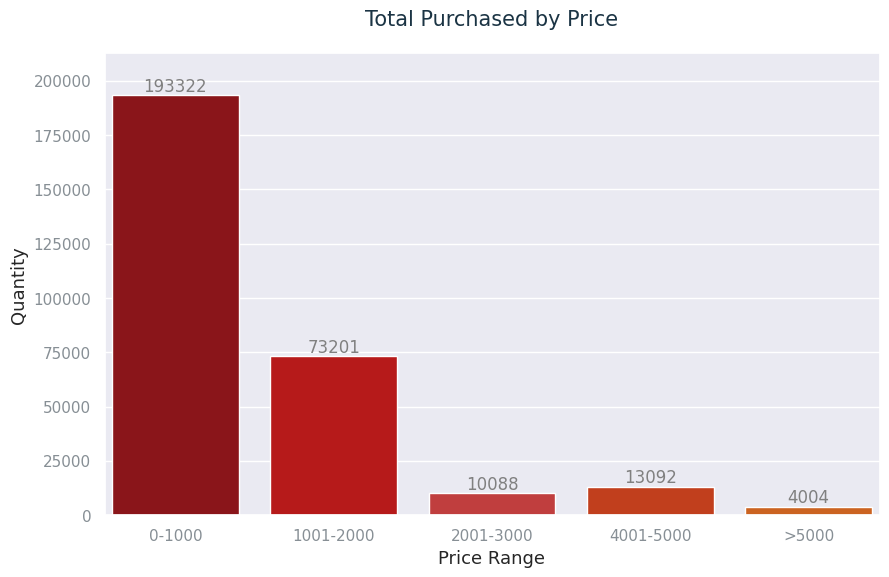

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_quantity_per_price, x='price_group', y='quantity',  palette=['#9d0208','#d00000','#d62828','#dc2f02','#e85d04','#f48c06'])

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='grey')

plt.title('Total Purchased by Price', pad=20, fontsize=15, color='#1B3444')
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.xlabel('Price Range', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.margins(x=0.01, y=0.1)
plt.show()

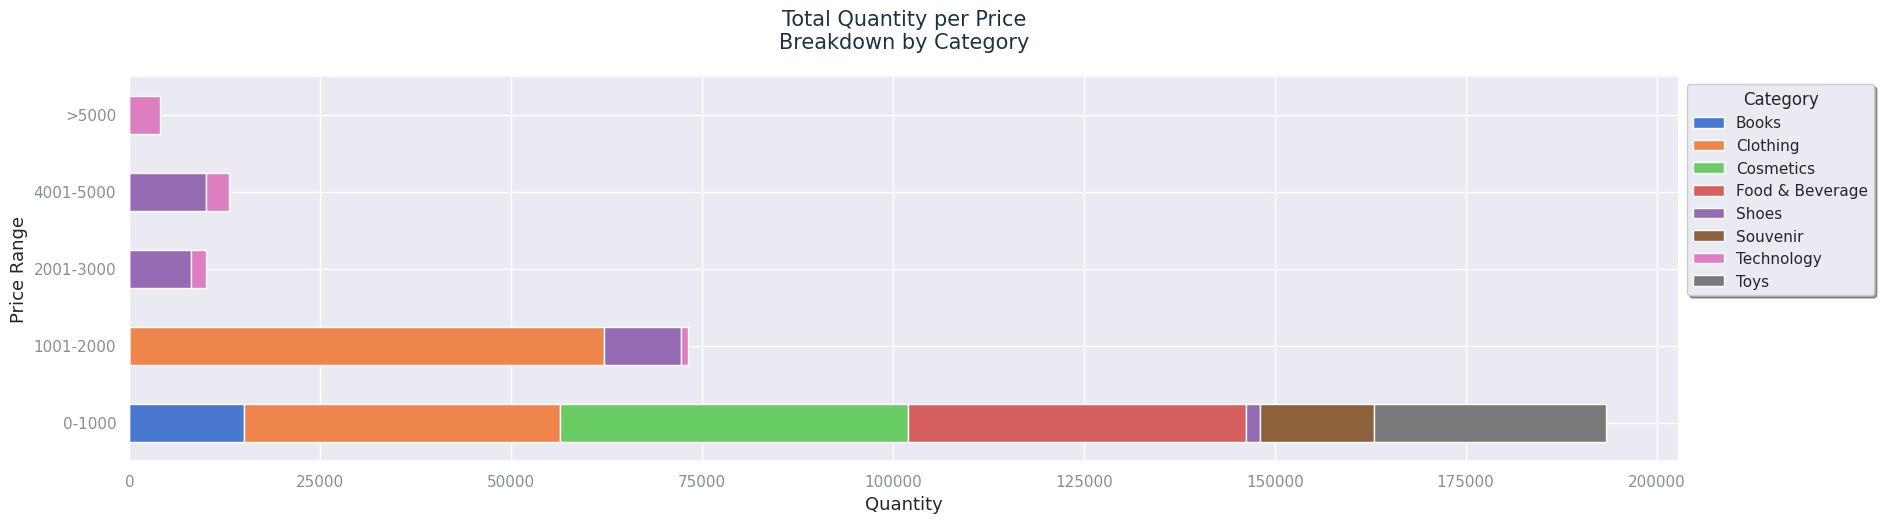

In [47]:
colors = sns.color_palette('muted')
ax = df.groupby(['price_group','category'])['quantity'].sum().unstack().plot(kind='barh', 
                                                                                  stacked=True, 
                                                                                  figsize=(20, 5),
                                                                                  color=colors 
                                                                                  )
# # show bar labels
# for i in ax.containers:
#   ax.bar_label(i, label_type='center', fontsize=8, color='white')

ax.set_title('Total Quantity per Price\nBreakdown by Category', pad=20, fontsize=15, color='#1B3444')
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('Price Range', fontsize=13)
plt.legend(title='Category', shadow=True, loc='upper left', bbox_to_anchor=(1,1))
plt.show()

## Customer Shopping - 2023

In [48]:
df_2023 = df[(df['invoice_month'] >= '2023-01-01')].reset_index().sort_values(by='invoice_date')
df_2023.tail()

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,invoice_month,invoice_day,age_group,price_group
8176,21980,I232232,C955045,Female,25,Clothing,1,300.08,Cash,2023-03-08,Metrocity,300.08,2023-03-01,Wednesday,21-30,0-1000
8175,61644,I200744,C224026,Female,59,Cosmetics,5,203.30,Credit Card,2023-03-08,Kanyon,1016.50,2023-03-01,Wednesday,51-60,0-1000
8174,16980,I311529,C653081,Female,48,Clothing,3,900.24,Credit Card,2023-03-08,Forum Istanbul,2700.72,2023-03-01,Wednesday,41-50,0-1000
8186,10182,I139860,C224033,Male,28,Clothing,5,1500.40,Debit Card,2023-03-08,Emaar Square Mall,7502.00,2023-03-01,Wednesday,21-30,1001-2000
8149,39980,I235798,C106518,Male,64,Technology,4,4200.00,Cash,2023-03-08,Mall of Istanbul,16800.00,2023-03-01,Wednesday,>60,>5000


In [49]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8524 entries, 0 to 8149
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           8524 non-null   int64         
 1   invoice_no      8524 non-null   object        
 2   customer_id     8524 non-null   object        
 3   gender          8524 non-null   object        
 4   age             8524 non-null   int64         
 5   category        8524 non-null   object        
 6   quantity        8524 non-null   int64         
 7   price           8524 non-null   float64       
 8   payment_method  8524 non-null   object        
 9   invoice_date    8524 non-null   datetime64[ns]
 10  shopping_mall   8524 non-null   object        
 11  total_price     8524 non-null   float64       
 12  invoice_month   8524 non-null   datetime64[ns]
 13  invoice_day     8524 non-null   object        
 14  age_group       8524 non-null   category      
 15  pric

In [50]:
df_2023.shape

(8524, 16)

### Top 5 Shopping Mall

In [51]:
# Top 5 Shopping Mall with the most customers - 2023
top_shopping_mall_2023_byCustomer= df_2023.groupby('shopping_mall')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False).head()
top_shopping_mall_2023_byCustomer

,shopping_mall,customer_id
4,Kanyon,1724
5,Mall of Istanbul,1715
6,Metrocity,1265
7,Metropol AVM,869
3,Istinye Park,841


<Figure size 640x480 with 0 Axes>

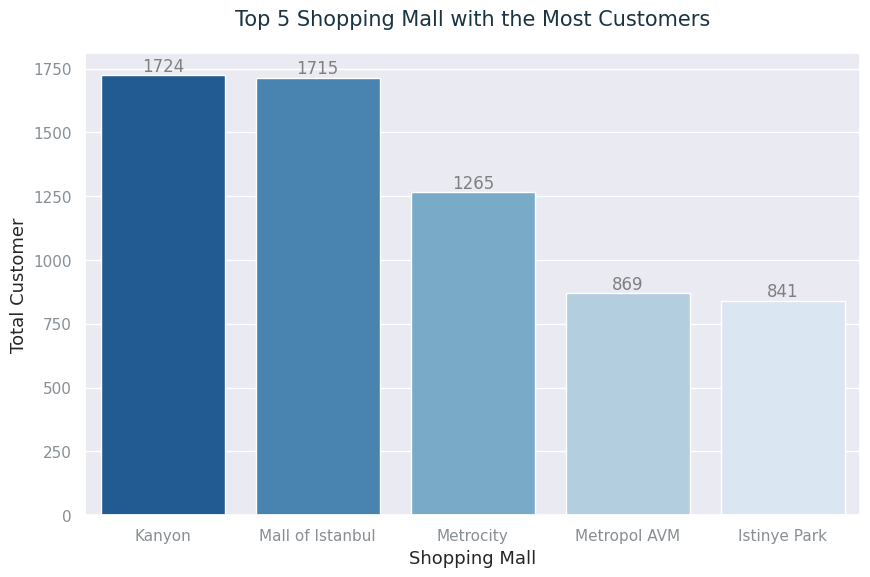

In [52]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=top_shopping_mall_2023_byCustomer, x='shopping_mall', y='customer_id',  palette='Blues_r')
sns.set_theme(style="darkgrid")
ax.set_title('Top 5 Shopping Mall with the Most Customers', pad=20, fontsize=15, color='#1B3444')
# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='grey')
plt.xlabel('Shopping Mall', fontsize=13)
plt.ylabel('Total Customer', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.show()

In [53]:
# Top 5 Shopping Mall with the highest revenue - 2023
top_shopping_mall_2023_byRevenue= df_2023.groupby('shopping_mall')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False).head()
top_shopping_mall_2023_byRevenue

,shopping_mall,total_price
4,Kanyon,4463814.72
5,Mall of Istanbul,4192962.95
6,Metrocity,3392474.91
7,Metropol AVM,2208586.86
3,Istinye Park,1995730.84


<Figure size 640x480 with 0 Axes>

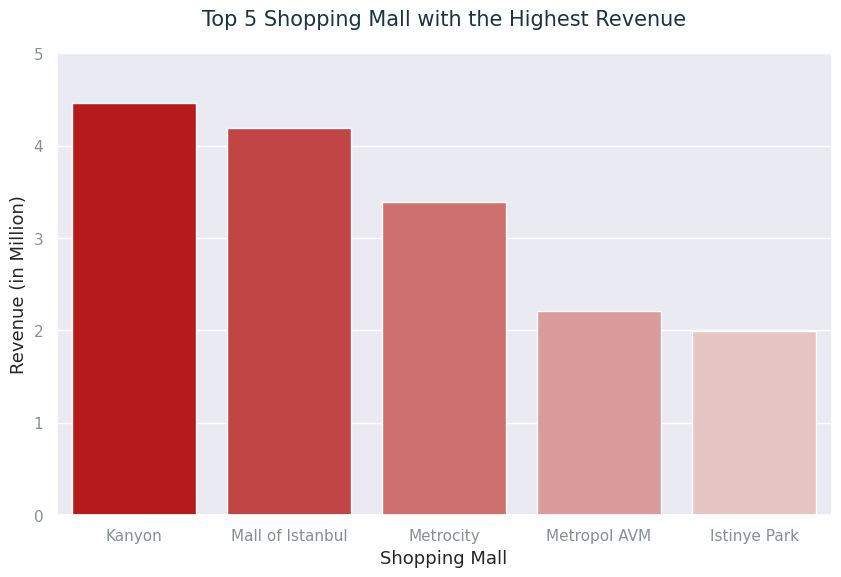

In [54]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=top_shopping_mall_2023_byRevenue, x='shopping_mall', y='total_price',  palette=sns.light_palette("#d00000", reverse=True))
ax.set_title('Top 5 Shopping Mall with the Highest Revenue', pad=20, fontsize=15, color='#1B3444')
sns.set_theme(style="darkgrid")

# for i in ax.containers:
#   ax.bar_label(i, label_type='edge', color='grey')

plt.xlabel('Shopping Mall', fontsize=13)
plt.ylabel('Revenue (in Million)', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

### Top 5 Category - 2023

In [55]:
# Top 5 category - 2023
top_category_2023= df_2023.groupby('category')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head()
top_category_2023

,category,quantity
1,Clothing,8798
2,Cosmetics,4061
3,Food & Beverage,3731
4,Shoes,2524
7,Toys,2471


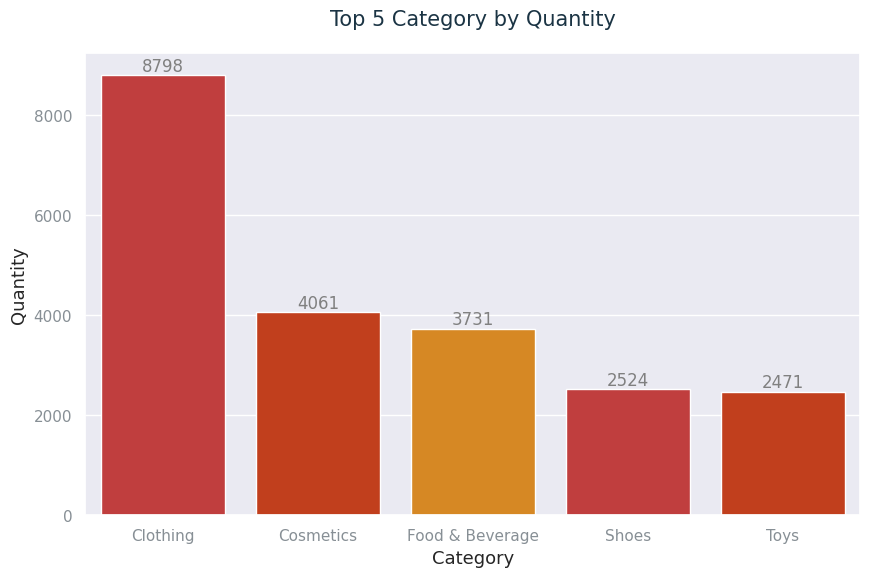

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=top_category_2023, x='category', y='quantity',  palette=['#d62828','#dc2f02','#f48c06'])

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='grey')

plt.title('Top 5 Category by Quantity', pad=20, fontsize=15, color='#1B3444')
plt.xlabel('Category', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
plt.show()

In [57]:
df_top_category_2023 = df_2023[df_2023['category'].isin(top_category_2023['category'].to_list())]
df_top_category_2023

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,invoice_month,invoice_day,age_group,price_group
0,88458,I238110,C144631,Male,68,Toys,2,71.68,Cash,2023-01-01,Forum Istanbul,143.36,2023-01-01,Sunday,>60,0-1000
93,27257,I287737,C220189,Male,36,Cosmetics,2,81.32,Credit Card,2023-01-01,Kanyon,162.64,2023-01-01,Sunday,31-40,0-1000
94,16144,I308047,C219753,Male,45,Food & Beverage,1,5.23,Credit Card,2023-01-01,Istinye Park,5.23,2023-01-01,Sunday,41-50,0-1000
95,69232,I712981,C326381,Female,63,Clothing,3,900.24,Credit Card,2023-01-01,Metrocity,2700.72,2023-01-01,Sunday,>60,0-1000
96,34688,I218024,C498183,Female,64,Clothing,5,1500.40,Cash,2023-01-01,Metropol AVM,7502.00,2023-01-01,Sunday,>60,1001-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,37566,I178668,C646646,Male,67,Clothing,3,900.24,Credit Card,2023-03-08,Mall of Istanbul,2700.72,2023-03-01,Wednesday,>60,0-1000
8176,21980,I232232,C955045,Female,25,Clothing,1,300.08,Cash,2023-03-08,Metrocity,300.08,2023-03-01,Wednesday,21-30,0-1000
8175,61644,I200744,C224026,Female,59,Cosmetics,5,203.30,Credit Card,2023-03-08,Kanyon,1016.50,2023-03-01,Wednesday,51-60,0-1000
8174,16980,I311529,C653081,Female,48,Clothing,3,900.24,Credit Card,2023-03-08,Forum Istanbul,2700.72,2023-03-01,Wednesday,41-50,0-1000


### Top Category Revenue

In [58]:
df_top_category_revenue = df_top_category_2023.groupby(['invoice_date','category'])['total_price'].sum().reset_index()
df_top_category_revenue

,invoice_date,category,total_price
0,2023-01-01,Clothing,189950.64
1,2023-01-01,Cosmetics,6871.54
2,2023-01-01,Food & Beverage,821.11
3,2023-01-01,Shoes,142240.29
4,2023-01-01,Toys,9712.64
...,...,...,...
330,2023-03-08,Clothing,132035.20
331,2023-03-08,Cosmetics,9107.84
332,2023-03-08,Food & Beverage,700.82
333,2023-03-08,Shoes,96627.37


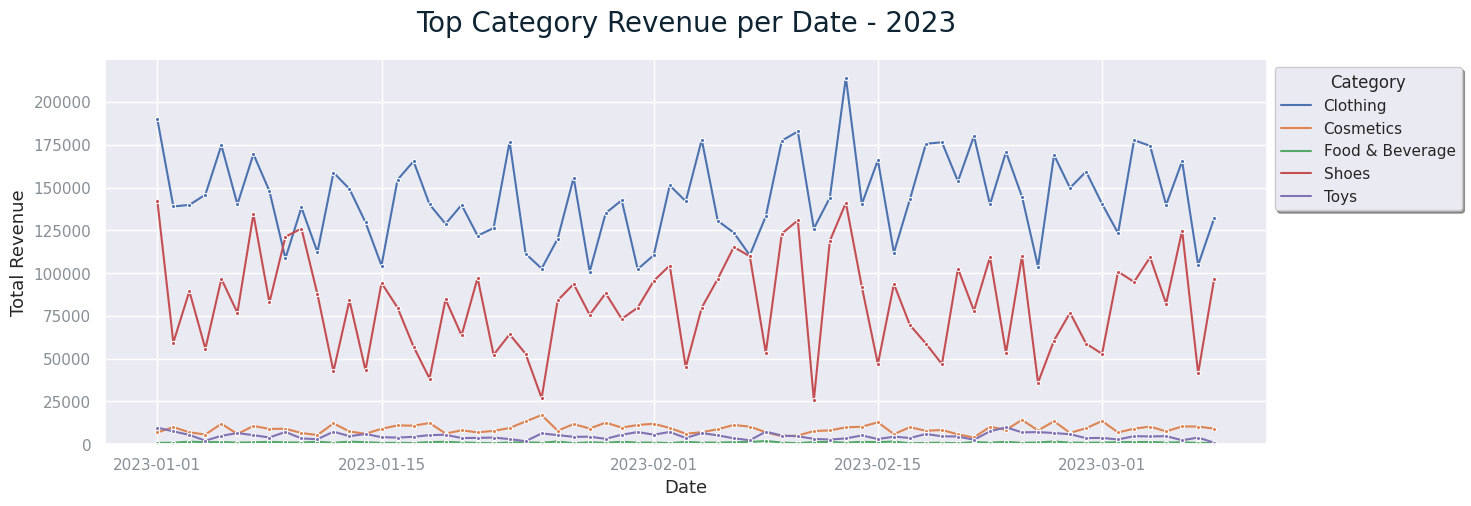

In [59]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_top_category_revenue, x='invoice_date', y='total_price',hue='category', color='c', marker='.')
plt.title('Top Category Revenue per Date - 2023', pad=20, fontsize=20, color='#0E2433')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Total Revenue', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
#plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.legend(title='Category', shadow=True, loc='upper left', bbox_to_anchor=(1,1))
plt.show()

## Total transaction by Weekday

In [63]:
df_transaction_day = df_2023.groupby('invoice_day').agg({'customer_id': 'count',
                                                         'total_price': 'sum'}).reset_index()
df_transaction_day

,invoice_day,customer_id,total_price
0,Friday,1151,2995458.67
1,Monday,1294,3567071.07
2,Saturday,1154,2962280.87
3,Sunday,1277,3208660.86
4,Thursday,1176,2815292.33
5,Tuesday,1239,3191739.98
6,Wednesday,1233,2767905.80


In [65]:
from pandas.api.types import CategoricalDtype

days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=days, ordered=True)

df_day_of_week = df_2023.groupby('invoice_day').agg({'customer_id': 'count',
                                                         'total_price': 'sum'}).reset_index()
df_day_of_week['invoice_day'] = df_day_of_week['invoice_day'].astype(day_type)
df_day_of_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   invoice_day  7 non-null      category
 1   customer_id  7 non-null      int64   
 2   total_price  7 non-null      float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 603.0 bytes


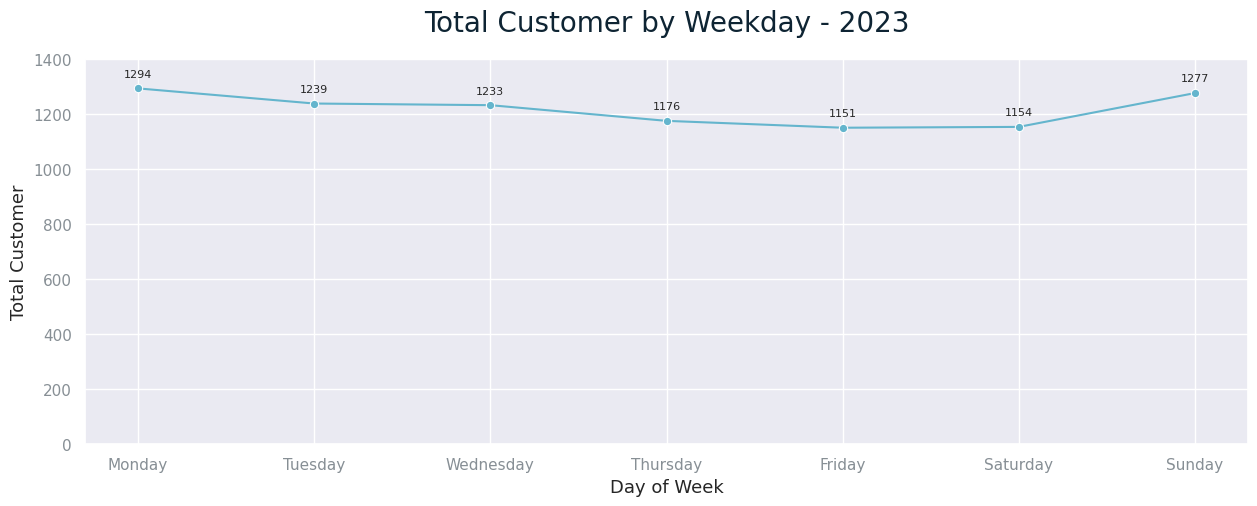

In [66]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_day_of_week, x='invoice_day', y='customer_id', color='c', marker='o')
plt.title('Total Customer by Weekday - 2023', pad=20, fontsize=20, color='#0E2433')

for x, y in zip(df_day_of_week['invoice_day'], df_day_of_week['customer_id']):
  plt.annotate(y,
                  (x,y),
                  textcoords="offset points",
                  xytext=(0,8),
                  ha='center',
                  size=8
                  )

plt.xlabel('Day of Week', fontsize=13)
plt.ylabel('Total Customer', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
#plt.xlim(xmin=0)
plt.ylim(ymin=0, ymax = 1400)
plt.show()

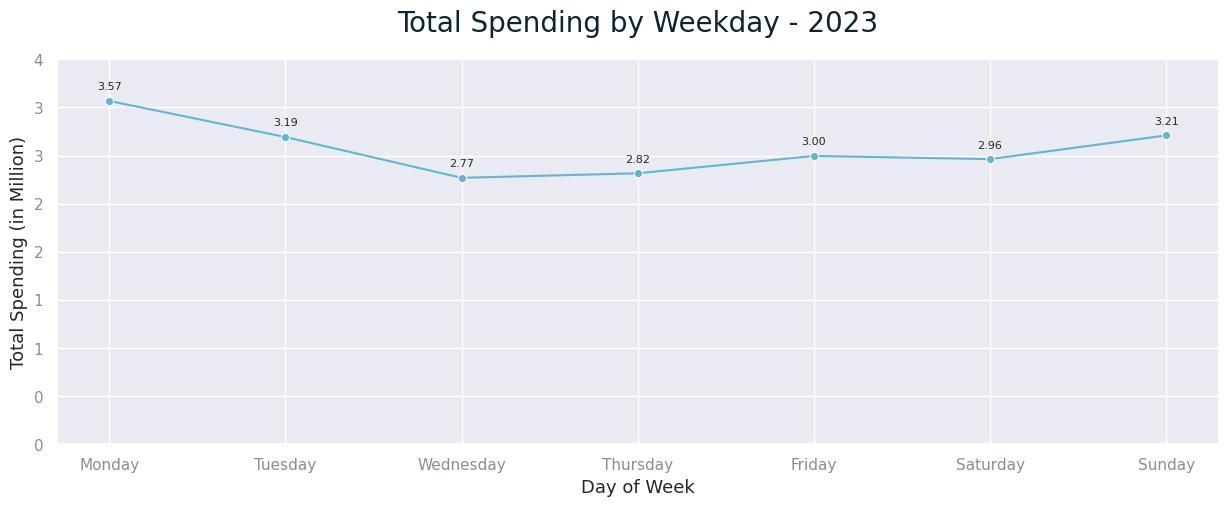

In [67]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_day_of_week, x='invoice_day', y='total_price', color='c', marker='o')
plt.title('Total Spending by Weekday - 2023', pad=20, fontsize=20, color='#0E2433')

for x, y in zip(df_day_of_week['invoice_day'], df_day_of_week['total_price']):
  label = '{:.2f}'.format(y/1000000)
  plt.annotate(label,
                  (x,y),
                  textcoords="offset points",
                  xytext=(0,8),
                  ha='center',
                  size=8
                  )

plt.xlabel('Day of Week', fontsize=13)
plt.ylabel('Total Spending (in Million)', fontsize=13)
plt.xticks(color='#878F95')
plt.yticks(color='#878F95')
#plt.xlim(xmin=0)
plt.ylim(ymin=0)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

plt.show()